In [21]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon

import matplotlib.pyplot as plt
%matplotlib inline

import calendar

import folium
from folium import plugins
from folium.plugins import HeatMapWithTime

In [27]:
archivo_datos = "datos/ara-ambiguus-cr.csv"

nombre_cientifico = "Ara ambiguus"


In [30]:
registros_presencia_df = pd.read_csv(archivo_datos, sep='\t')


In [65]:
registros_presencia_df = registros_presencia_df[['species', 'stateProvince', 'locality', 'decimalLongitude', 'decimalLatitude', 'eventDate']]


In [66]:
registros_presencia_df.eventDate.dtypes

dtype('<M8[ns]')

In [67]:
registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])

<ipython-input-67-0fdb92e3c617>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  registros_presencia_df["eventDate"] = pd.to_datetime(registros_presencia_df["eventDate"])


In [68]:
registros_presencia_df.eventDate.dtypes

dtype('<M8[ns]')

In [69]:
plt.style.use('ggplot')

In [70]:
registros_x_mes = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.month).count().eventDate

registros_x_mes

eventDate
1.0     46
2.0     49
3.0     37
4.0     24
5.0     22
6.0     30
7.0     41
8.0      7
9.0      5
10.0    14
11.0    25
12.0    22
Name: eventDate, dtype: int64

In [71]:
registros_x_mes.index=[calendar.month_name[x] for x in range(1,13)]

registros_x_mes

January      46
February     49
March        37
April        24
May          22
June         30
July         41
August        7
September     5
October      14
November     25
December     22
Name: eventDate, dtype: int64

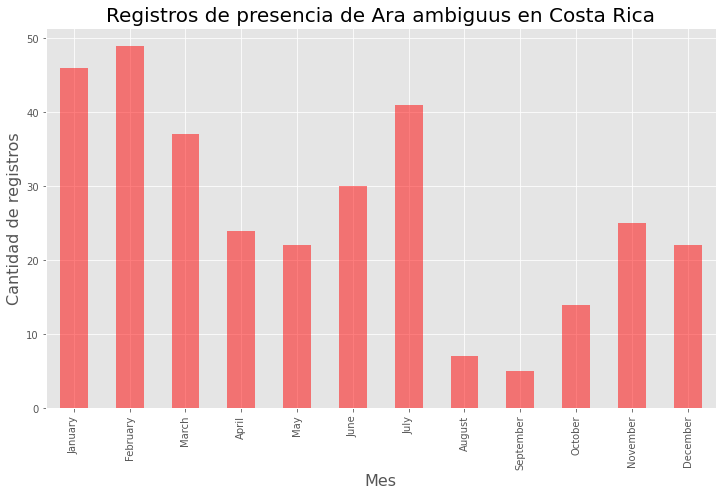

In [72]:
# Gráfico de barras
registros_x_mes.plot(kind='bar',figsize=(12,7), color='red', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica', fontsize=20)
plt.xlabel('Mes', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [73]:
registros_x_ano = registros_presencia_df.groupby(registros_presencia_df['eventDate'].dt.year).count().eventDate

registros_x_ano

eventDate
1933.0     2
2000.0     1
2001.0     2
2002.0     2
2003.0     1
2004.0     4
2006.0     1
2007.0     1
2009.0     1
2011.0    11
2012.0     5
2013.0    34
2014.0    18
2015.0    21
2016.0    38
2017.0    33
2018.0    52
2019.0    86
2020.0     9
Name: eventDate, dtype: int64

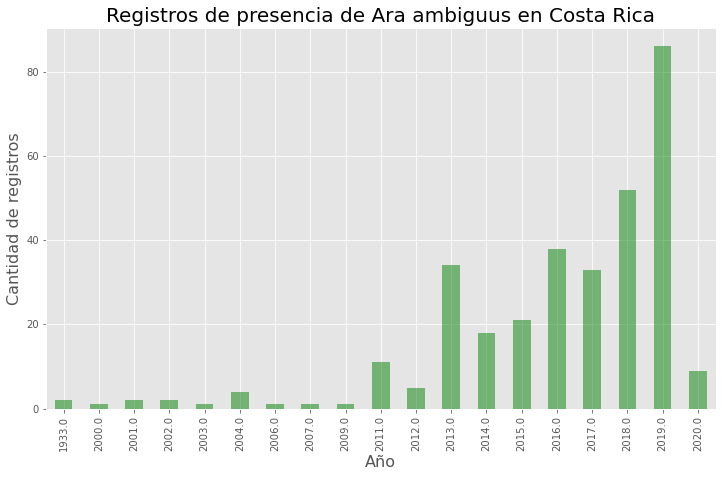

In [74]:
# Gráfico de barras
registros_x_ano.plot(kind='bar',figsize=(12,7), color='green', alpha=0.5)

# Título y leyendas en los ejes
plt.title('Registros de presencia de ' + nombre_cientifico + ' en Costa Rica', fontsize=20)
plt.xlabel('Año', fontsize=16)
plt.ylabel('Cantidad de registros', fontsize=16);

In [75]:
# Geodataframe
registros_presencia_geom = [Point(xy) for xy in zip(registros_presencia_df["decimalLongitude"], registros_presencia_df["decimalLatitude"])]
registros_presencia_gdf=gpd.GeoDataFrame(registros_presencia_df, crs={"init": "epsg:4326"}, geometry=registros_presencia_geom)

C:\Users\Usuario\anaconda3\envs\leccion-12a\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [76]:
# Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.63, -84], zoom_start=8,control_scale=True, name='Registros')
folium.TileLayer(
    tiles='CartoDB positron', 
    name='CartoDB positron').add_to(registros_presencia_mapa)

folium.TileLayer(
    tiles='Stamen Terrain', 
    name='Stamen Terrain').add_to(registros_presencia_mapa)

# Mapeo de los puntos correspondientes a los registros de presencia
for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        color='green',
        fill=True,
        popup=label,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(registros_presencia_mapa)
    
folium.LayerControl().add_to(registros_presencia_mapa)

registros_presencia_mapa

In [77]:
# Mapa centrado en Costa Rica
registros_presencia_mapa = folium.Map(location=[9.63, -84], zoom_start=8, control_scale=True)
folium.TileLayer(
    tiles='CartoDB positron', 
    name='CartoDB positron').add_to(registros_presencia_mapa)

folium.TileLayer(
    tiles='Stamen Terrain', 
    name='Stamen Terrain').add_to(registros_presencia_mapa)

# Instantiate a mark cluster object for the car accidents
registros_presencia_cluster = plugins.MarkerCluster(name='Clusters').add_to(registros_presencia_mapa)

for lat, lng, label in zip(registros_presencia_df.decimalLatitude, registros_presencia_df.decimalLongitude, registros_presencia_df.eventDate.astype(str)):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(registros_presencia_cluster)   
    
folium.LayerControl().add_to(registros_presencia_mapa)
    
registros_presencia_mapa